In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
%matplotlib inline

In [3]:
db = sqlite3.connect('file:../results/classify_cinc2017/experiments.db?mode=ro', uri=True)

In [4]:
pd.read_sql_query('SELECT * FROM experiments', db)

,id,folds,rseed,start,epochs,inproj_size,inproj_stride,inproj_norm,hidden,kernel_size,...,depth_variant,stride_on,outproj_size,dropout,leak,layer_norm,batch_size,trim_prob,trim_min,lr
0,1,5,1234,2021-10-27 00:45:11.566884,200,7,4,0,64,5,...,1,All,64,0.1,0.0,0,32,0.9,0.5,0.001


In [7]:
overall_res = pd.read_sql_query('''
SELECT
    phase,
    epoch,
    AVG(loss) AS loss,
    AVG(accuracy) AS accuracy,
    AVG(f1_nao) AS f1,
    AVG(auroc_nao) AS auroc
FROM results
WHERE experiment_id=1
GROUP BY epoch, phase
''', db)

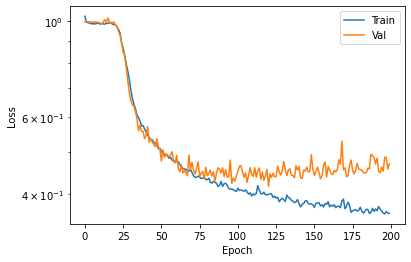

In [10]:
for name, res in overall_res.groupby('phase'):
    plt.plot(res['epoch'], res['loss'], label=name)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()

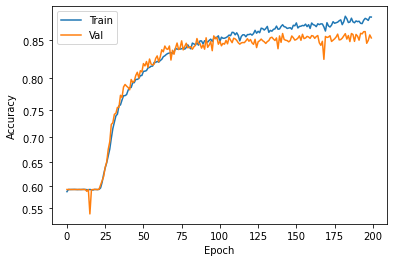

In [11]:
for name, res in overall_res.groupby('phase'):
    plt.plot(res['epoch'], res['accuracy'], label=name)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yscale('logit')
plt.legend()

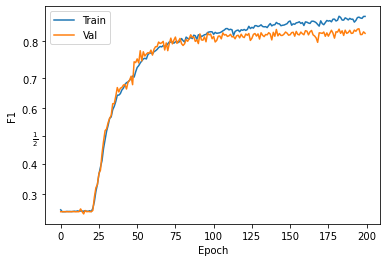

In [12]:
for name, res in overall_res.groupby('phase'):
    plt.plot(res['epoch'], res['f1'], label=name)
plt.xlabel('Epoch')
plt.ylabel('F1')
plt.yscale('logit')
plt.legend()

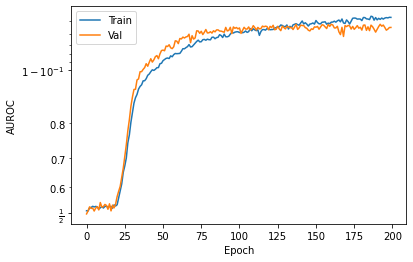

In [13]:
for name, res in overall_res.groupby('phase'):
    plt.plot(res['epoch'], res['auroc'], label=name)
plt.xlabel('Epoch')
plt.ylabel('AUROC')
plt.yscale('logit')
plt.legend()